<a href="https://colab.research.google.com/github/divyeeee/Neurcryption/blob/main/Neurcryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim nltk

In [2]:
!pip uninstall -y numpy gensim
!pip install numpy==1.23.5 gensim

from gensim.models import Word2Vec
sentences = [["iam", "enjoy", "codin", "i", "will", "become", "the", "pirate", "king"]]
model = Word2Vec(sentences=sentences, vector_size=100, window=2, min_count=1, workers=1, sg=1)
words = ["iam", "enjoy", "codin", "pirate"]
vectors = {word: model.wv[word] for word in words}
print("Word2Vec Embeddings:")
for word, vector in vectors.items():
    print(f"{word}: {vector[:10]}... (length: {len(vector)})")

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>

Word2Vec Embeddings:
iam: [-0.00957855  0.00894312  0.00416507  0.00923473  0.0066435   0.00292474
  0.00980402 -0.00442464 -0.00680331  0.00422738]... (length: 100)
enjoy: [ 0.00816813 -0.00444303  0.00898543  0.00825366 -0.00443523  0.00030311
  0.00427449 -0.00392632 -0.00555996 -0.00651232]... (length: 100)
codin: [ 8.1322715e-03 -4.4573341e-03 -1.0683573e-03  1.0063648e-03
 -1.9111396e-04  1.1481774e-03  6.1138608e-03 -2.0271540e-05
 -3.2459653e-03 -1.5107286e-03]... (length: 100)
pirate: [-0.0086199   0.00366583  0.00519001  0.00574208  0.0074671  -0.00616783
  0.00110564  0.00604743 -0.00284012 -0.00617367]... (length: 100)


In [ ]:
#2. FastText (Gensim) - Subword Embeddings
# FastText extends Word2Vec by including character n-grams, good for out-of-vocabulary words.

from gensim.models import FastText
sentences = [["i", "enjoy", "coding"]]
model = FastText(sentences=sentences, vector_size=10, window=2, min_count=1, workers=1)

words = ["i", "e", "coding", "code","p","p","z"]
vectors = {word: model.wv[word] for word in words}

print("FastText Embeddings:")
for word, vector in vectors.items():
    print(f"{word}: {vector[:5]}... (length: {len(vector)})")


FastText Embeddings:
i: [0.01173906 0.04095269 0.02315251 0.01194031 0.06917371]... (length: 10)
e: [ 0.0054383   0.03754957  0.06347091  0.01471301 -0.08133388]... (length: 10)
coding: [ 0.00253337 -0.00780276 -0.00288704  0.00494688 -0.01213455]... (length: 10)
code: [ 0.03018976  0.01044156 -0.00650893  0.01281644 -0.02468518]... (length: 10)
p: [-0.07822647 -0.08812777 -0.0872265  -0.07421611 -0.03041042]... (length: 10)
z: [-0.00948129  0.05664357 -0.03393369 -0.09937457  0.03903409]... (length: 10)


In [ ]:
# 3. GloVe (Pre-trained via gensim.downloader)

import gensim.downloader as api
model = api.load("glove-twitter-25")

words = ["iamus", "enjoy", "coding"]

vectors = {word: model[word] if word in model else None for word in words}

print("GloVe Embeddings:")
for word, vector in vectors.items():
    if vector is not None:
        print(f"{word}: {vector[:25]}... (length: {len(vector)})")
    else:
        print(f"{word}: Not in vocabulary")

[==================================================] 100.0% 104.8/104.8MB downloaded
GloVe Embeddings:
iamus: Not in vocabulary
enjoy: [-0.8138    0.69989  -0.23549  -0.096892 -0.35515   0.44054   1.7738
  0.03799  -0.37699   0.16381  -0.81882   0.080593 -3.5741    0.11813
 -0.092855  0.25156   0.33449  -1.0556   -0.47396  -0.36944  -0.79883
 -0.62922  -1.0395    0.70612   0.15686 ]... (length: 25)
coding: [ 0.061168  0.5438   -0.36939  -0.50704   1.313    -0.28085   0.52345
 -1.3281    1.6664    0.13211  -0.65829  -0.014095 -1.5945   -0.45203
  0.91615   0.54909   0.65284   0.12368   0.75391  -0.1556   -0.97745
 -0.5288   -1.0709    0.20596  -0.062691]... (length: 25)


In [ ]:
# 3. GloVe (Pre-trained via gensim.downloader)

import gensim.downloader as api

model = api.load("glove-twitter-25")

words = ["i", "enjoy", "games"]

vectors = {word: model[word] if word in model else None for word in words}

print("GloVe Embeddings:")
for word, vector in vectors.items():
    if vector is not None:
        print(f"{word}: {vector[:25]}... (length: {len(vector)})")
    else:
        print(f"{word}: Not in vocabulary")

GloVe Embeddings:
i: [-0.26079   0.59108   0.61622  -0.70368  -0.85159  -0.23238   1.0481
  0.066642 -0.54907   0.70047  -0.87221  -0.013954 -5.9671   -0.43106
 -0.9154    0.53744   0.57099  -0.27181  -0.84178  -0.59682   0.4516
  0.34097   0.076869  0.2284    0.2758  ]... (length: 25)
enjoy: [-0.8138    0.69989  -0.23549  -0.096892 -0.35515   0.44054   1.7738
  0.03799  -0.37699   0.16381  -0.81882   0.080593 -3.5741    0.11813
 -0.092855  0.25156   0.33449  -1.0556   -0.47396  -0.36944  -0.79883
 -0.62922  -1.0395    0.70612   0.15686 ]... (length: 25)
games: [ 1.2995    0.49075   0.16882  -1.3257    0.14521   0.3295    1.4301
 -0.21212   0.087044 -0.4852    0.48735   0.24298  -3.7323    0.17336
  0.78839   0.47086  -0.42501  -0.84781  -0.082888 -0.075557 -1.5511
 -0.065861  0.12276  -0.59067   0.17092 ]... (length: 25)


In [ ]:
# Enhanced Example (Using Pre-Trained Word2Vec)
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

words = ["i", "enjoy", "coding"]

vectors = {word: model[word] if word in model else None for word in words}
print("Pre-trained Word2Vec Embeddings:")
for word, vector in vectors.items():
    if vector is not None:
        print(f"{word}: {vector[:5]}... (length: {len(vector)})")
    else:
        print(f"{word}: Not in vocabulary")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Pre-trained Word2Vec Embeddings:
i: [-0.22558594 -0.01953125  0.09082031  0.23730469 -0.02929688]... (length: 300)
enjoy: [-0.00125885 -0.04833984 -0.28320312  0.32421875  0.01446533]... (length: 300)
coding: [-0.1328125  -0.18457031  0.06176758  0.26757812 -0.16796875]... (length: 300)


In [ ]:
words = ["i", "enjoy", "coding","i","ammm","gonna","be","the","pirate","king"]

vectors = {word: model[word] if word in model else None for word in words}

print("Pre-trained Word2Vec Embeddings:")
for word, vector in vectors.items():
    if vector is not None:
        print(f"{word}: {vector[:5]}... (length: {len(vector)})")
    else:
        print(f"{word}: Not in vocabulary")

Pre-trained Word2Vec Embeddings:
i: [-0.26079  0.59108  0.61622 -0.70368 -0.85159]... (length: 25)
enjoy: [-0.8138    0.69989  -0.23549  -0.096892 -0.35515 ]... (length: 25)
coding: [ 0.061168  0.5438   -0.36939  -0.50704   1.313   ]... (length: 25)
ammm: Not in vocabulary
gonna: [-0.41481  1.27     0.5755  -0.92254 -0.76631]... (length: 25)
be: [-0.3435    1.0138   -0.039231 -0.61739  -0.13    ]... (length: 25)
the: [-0.010167  0.020194  0.21473   0.17289  -0.43659 ]... (length: 25)
pirate: [-0.40985  -0.26059  -0.30654  -0.052386 -0.025489]... (length: 25)
king: [-0.74501 -0.11992  0.37329  0.36847 -0.4472 ]... (length: 25)


In [ ]:
# Simple implementation of Autoencoders
import torch
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        encoded = torch.relu(self.encoder(x))
        decoded = self.decoder(encoded)
        return encoded,decoded

input_dim = 100
hidden_dim = 10
model = AutoEncoder(input_dim, hidden_dim)

data = torch.randn(10, 100)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    optimizer.zero_grad()
    encoded,output = model(data)
    loss = criterion(output, data)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')
print(encoded)


Epoch 1, Loss: 1.1262187957763672
Epoch 2, Loss: 1.1145907640457153
Epoch 3, Loss: 1.1041369438171387
Epoch 4, Loss: 1.095030426979065
Epoch 5, Loss: 1.0866079330444336
Epoch 6, Loss: 1.0787707567214966
Epoch 7, Loss: 1.0715028047561646
Epoch 8, Loss: 1.064879298210144
Epoch 9, Loss: 1.0589967966079712
Epoch 10, Loss: 1.0538684129714966
Epoch 11, Loss: 1.0491294860839844
Epoch 12, Loss: 1.0448768138885498
Epoch 13, Loss: 1.0408858060836792
Epoch 14, Loss: 1.0371075868606567
Epoch 15, Loss: 1.0335164070129395
Epoch 16, Loss: 1.0300990343093872
Epoch 17, Loss: 1.026790976524353
Epoch 18, Loss: 1.023591160774231
Epoch 19, Loss: 1.0205211639404297
Epoch 20, Loss: 1.017626404762268
Epoch 21, Loss: 1.0147225856781006
Epoch 22, Loss: 1.0118118524551392
Epoch 23, Loss: 1.0090885162353516
Epoch 24, Loss: 1.0063118934631348
Epoch 25, Loss: 1.0034821033477783
Epoch 26, Loss: 1.0005992650985718
Epoch 27, Loss: 0.9976642727851868
Epoch 28, Loss: 0.994654655456543
Epoch 29, Loss: 0.9915465116500854


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from nltk.tokenize import word_tokenize
import gensim.downloader as api
import numpy as np
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

nltk.download('punkt')
nltk.download('punkt_tab')
print("Starting FastText model download (check logs for progress)...")
fasttext_model = api.load("fasttext-wiki-news-subwords-300")
print("Model loaded successfully")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Starting FastText model download (check logs for progress)...
[==================================================] 100.0% 958.5/958.4MB downloaded
Model loaded successfully


In [ ]:
# Now implementing using real life text examples with pretrained FastText embeddings
# Real text data (example sentences)
sentences = [
    "I enjoy coding in Python",
    "Machine learning is fun",
    "Deep neural networks rock",
    "Text processing is cool",
    "Autoencoders compress data",
    "FastText generates vectors",
    "Natural language is complex",
    "AI models are powerful",
    "Training takes time",
    "Vectors represent meaning"
]
print("Input sentences:", sentences)
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
print("Tokenized (first 3):", tokenized_sentences[:3])

def sentence_to_vector(tokens, model):
    vectors = [model[word] for word in tokens if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    return np.zeros(300)

data = torch.tensor([sentence_to_vector(tokens, fasttext_model) for tokens in tokenized_sentences],
                    dtype=torch.float32)
print("Data shape:", data.shape)

# Autoencoder Model
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        encoded = torch.relu(self.encoder(x))
        decoded = self.decoder(encoded)
        return encoded,decoded
# Hyperparameters
input_dim = 300
hidden_dim = 50
model = AutoEncoder(input_dim, hidden_dim)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    encoded, output = model(data)
    loss = criterion(output, data)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")


Input sentences: ['I enjoy coding in Python', 'Machine learning is fun', 'Deep neural networks rock', 'Text processing is cool', 'Autoencoders compress data', 'FastText generates vectors', 'Natural language is complex', 'AI models are powerful', 'Training takes time', 'Vectors represent meaning']
Tokenized (first 3): [['i', 'enjoy', 'coding', 'in', 'python'], ['machine', 'learning', 'is', 'fun'], ['deep', 'neural', 'networks', 'rock']]
Data shape: torch.Size([10, 300])
Epoch 20, Loss: 0.004100
Epoch 40, Loss: 0.001297
Epoch 60, Loss: 0.000782
Epoch 80, Loss: 0.000667
Epoch 100, Loss: 0.000612


<ipython-input-9-7c80e57b2801>:34: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  data = torch.tensor([sentence_to_vector(tokens, fasttext_model) for tokens in tokenized_sentences],


In [5]:
!pip install numpy --upgrade
!pip install --upgrade scipy
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from nltk.tokenize import word_tokenize
import gensim.downloader as api
import numpy as np
nltk.download('punkt')
sentences = [
    "I enjoy coding in Python",
    "Machine learning is fun",
    "Deep neural networks rock",
    "Text processing is cool",
    "Autoencoders compress data",
    "FastText generates vectors",
    "Natural language is complex",
    "AI models are powerful",
    "Training takes time",
    "Zxylophone represents sound"  # 'Zxylophone' is a deliberate OOV typo (should be 'xylophone')
]
print("Input sentences:", sentences)
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
print("Tokenized (first 3):", tokenized_sentences[:3])
fasttext_model = api.load("fasttext-wiki-news-subwords-300")
print("FastText model loaded")
def sentence_to_vector(tokens, model):
    vectors = []
    for word in tokens:
        if word in model:
            vectors.append(model[word])
            print(f"Word '{word}' found in vocab")
        else:
            vector = model[word]
            vectors.append(vector)
            print(f"Word '{word}' not in vocab, using subword vector")
    if vectors:
        return np.mean(vectors, axis=0)
    print(f"No valid vectors for tokens {tokens}, using zeros")
    return np.zeros(300)

data = torch.tensor([sentence_to_vector(tokens, fasttext_model) for tokens in tokenized_sentences],
                    dtype=torch.float32)
print("Data shape:", data.shape)

class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        encoded = torch.relu(self.encoder(x))
        decoded = self.decoder(encoded)
        return decoded

input_dim = 300
hidden_dim = 50
model = AutoEncoder(input_dim, hidden_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, data)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

with torch.no_grad():
    reconstructed = model(data)
    print("\nOriginal vectors (first sentence, first 5 dims):", data[0][:5].tolist())
    print("Reconstructed vectors (first sentence, first 5 dims):", reconstructed[0][:5].tolist())
    print("Original vectors (OOV sentence, first 5 dims):", data[-1][:5].tolist())
    print("Reconstructed vectors (OOV sentence, first 5 dims):", reconstructed[-1][:5].tolist())

# Cosine similarity for reconstruction quality
def cosine_similarity(vec1, vec2):
    dot_product = torch.sum(vec1 * vec2)
    norm1 = torch.norm(vec1)
    norm2 = torch.norm(vec2)
    return dot_product / (norm1 * norm2 + 1e-8)

print("\nCosine similarity (first and last sentences):")
sim_first = cosine_similarity(data[0], reconstructed[0])
sim_last = cosine_similarity(data[-1], reconstructed[-1])
print(f"First sentence: {sim_first.item():.4f}")
print(f"Last sentence (with OOV): {sim_last.item():.4f}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Input sentences: ['I enjoy coding in Python', 'Machine learning is fun', 'Deep neural networks rock', 'Text processing is cool', 'Autoencoders compress data', 'FastText generates vectors', 'Natural language is complex', 'AI models are powerful', 'Training takes time', 'Zxylophone represents sound']
Tokenized (first 3): [['i', 'enjoy', 'coding', 'in', 'python'], ['machine', 'learning', 'is', 'fun'], ['deep', 'neural', 'networks', 'rock']]
FastText model loaded
Word 'i' found in vocab
Word 'enjoy' found in vocab
Word 'coding' found in vocab
Word 'in' found in vocab
Word 'python' found in vocab
Word 'machine' found in vocab
Word 'learning' found in vocab
Word 'is' found in vocab
Word 'fun' found in vocab
Word 'deep' found in vocab
Word 'neural' found in vocab
Word 'networks' found in vocab
Word 'rock' found in vocab
Word 'text' found in vocab
Word 'processing' found in vocab
Word 'is' found in vocab
Word 'cool' found in vocab


KeyError: "Key 'autoencoders' not present"

In [ ]:

# !pip install gensim nltk

import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from nltk.tokenize import word_tokenize
import gensim.downloader as api
import numpy as np
import logging
import sys

logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO,
    handlers=[logging.StreamHandler(sys.stdout)]
)

nltk.download('punkt')
nltk.download('punkt_tab')

sentences = [
    "I enjoy coding in Python",
    "Machine learning is fun",
    "Deep neural networks rock",
    "Text processing is cool",
    "Auto encoders compress data",
    "Fast Text generates vectors",
    "Natural language is complex",
    "AI models are powerful",
    "Training takes time",
    "Vectors represent meaning"
]
print("Input sentences:", sentences)
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
print("Tokenized (first 3):", tokenized_sentences[:3])
print("Starting FastText model download (logs below)...")
fasttext_model = api.load("fasttext-wiki-news-subwords-300")  # 300D vectors
print("Model loaded successfully")
def sentence_to_vector(tokens, model):
    vectors = [model[word] for word in tokens]
    if vectors:
        return np.mean(vectors, axis=0)
    return np.zeros(300)

data = torch.tensor([sentence_to_vector(tokens, fasttext_model) for tokens in tokenized_sentences],
                    dtype=torch.float32)
print("Data shape:", data.shape)
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        encoded = torch.relu(self.encoder(x))
        decoded = self.decoder(encoded)
        return encoded, decoded
input_dim = 300
hidden_dim = 50
model = AutoEncoder(input_dim, hidden_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    encoded, output = model(data)
    loss = criterion(output, data)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")
        sys.stdout.flush()
with torch.no_grad():
    final_encoded, final_decoded = model(data)
    print("\nFinal Encoded (first sentence, first 5 dims):", final_encoded[0][:5].tolist())
    print("Final Decoded (first sentence, first 5 dims):", final_decoded[0][:5].tolist())
    print("Original (first sentence, first 5 dims):", data[0][:5].tolist())

# Save model state
torch.save(model.state_dict(), 'autoencoder.pth')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Input sentences: ['I enjoy coding in Python', 'Machine learning is fun', 'Deep neural networks rock', 'Text processing is cool', 'Auto encoders compress data', 'Fast Text generates vectors', 'Natural language is complex', 'AI models are powerful', 'Training takes time', 'Vectors represent meaning']
Tokenized (first 3): [['i', 'enjoy', 'coding', 'in', 'python'], ['machine', 'learning', 'is', 'fun'], ['deep', 'neural', 'networks', 'rock']]
Starting FastText model download (logs below)...
[==================================================] 100.0% 958.5/958.4MB downloaded
Model loaded successfully
Data shape: torch.Size([10, 300])


<ipython-input-10-29f76ce6d13e>:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  data = torch.tensor([sentence_to_vector(tokens, fasttext_model) for tokens in tokenized_sentences],


Epoch 20, Loss: 0.003378
Epoch 40, Loss: 0.001013
Epoch 60, Loss: 0.000622
Epoch 80, Loss: 0.000538
Epoch 100, Loss: 0.000477

Final Encoded (first sentence, first 5 dims): [0.0, 0.0, 0.09417052567005157, 0.0, 0.0930262953042984]
Final Decoded (first sentence, first 5 dims): [-0.02217268943786621, -0.021069776266813278, 0.034732475876808167, -0.005409024655818939, -0.034885942935943604]
Original (first sentence, first 5 dims): [-0.0415252186357975, -0.004205640405416489, 0.032052598893642426, 0.0054955994710326195, -0.026957739144563675]


In [ ]:

# !pip install gensim nltk

import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from nltk.tokenize import word_tokenize
import gensim.downloader as api
import numpy as np
import logging
import sys

logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO,
    handlers=[logging.StreamHandler(sys.stdout)]
)
sentences = [
    "I enjoy coding in Python",
    "Machine learning is fun",
    "Deep neural networks rock",
    "Text processing is cool",
    "Autoencoders compress data",
    "FastText generates vectors",
    "Natural language is complex",
    "AI models are powerful",
    "Training takes time",
    "Vectors represent meaning"
]
print("Input sentences:", sentences)

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
print("Tokenized (first 3):", tokenized_sentences[:3])

# print("Starting FastText model download...")
# fasttext_model = api.load("fasttext-wiki-news-subwords-300")
# print("Model loaded successfully")

def sentence_to_vector(tokens, model):
    vectors = []
    for word in tokens:
        try:
            vector = model[word]
            vectors.append(vector)
            if word in model.key_to_index:
                print(f"Word '{word}' found in vocabulary")
            else:
                print(f"Word '{word}' not in vocab, using subword vector (shouldn't see this)")
        except KeyError:
            print(f"OOV word '{word}' not in vocab, using zero vector as fallback")
            vectors.append(np.zeros(300))
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

data = torch.tensor([sentence_to_vector(tokens, fasttext_model) for tokens in tokenized_sentences],
                    dtype=torch.float32)
print("Data shape:", data.shape)
# Enhanced Autoencoder
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, hidden_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )
        # Initialize weights
        for layer in self.encoder:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
        for layer in self.decoder:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
input_dim = 300
hidden_dim = 50
model = AutoEncoder(input_dim, hidden_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    encoded, output = model(data)
    loss = criterion(output, data)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")
        sys.stdout.flush()
# Check reconstruction
with torch.no_grad():
    final_encoded, final_decoded = model(data)
    print("\nFinal Encoded (first sentence, first 5 dims):", final_encoded[0][:5].tolist())
    print("Final Decoded (first sentence, first 5 dims):", final_decoded[0][:5].tolist())
    print("Original (first sentence, first 5 dims):", data[0][:5].tolist())

torch.save(model.state_dict(), 'autoencoder.pth')

Input sentences: ['I enjoy coding in Python', 'Machine learning is fun', 'Deep neural networks rock', 'Text processing is cool', 'Autoencoders compress data', 'FastText generates vectors', 'Natural language is complex', 'AI models are powerful', 'Training takes time', 'Vectors represent meaning']
Tokenized (first 3): [['i', 'enjoy', 'coding', 'in', 'python'], ['machine', 'learning', 'is', 'fun'], ['deep', 'neural', 'networks', 'rock']]
Word 'i' found in vocabulary
Word 'enjoy' found in vocabulary
Word 'coding' found in vocabulary
Word 'in' found in vocabulary
Word 'python' found in vocabulary
Word 'machine' found in vocabulary
Word 'learning' found in vocabulary
Word 'is' found in vocabulary
Word 'fun' found in vocabulary
Word 'deep' found in vocabulary
Word 'neural' found in vocabulary
Word 'networks' found in vocabulary
Word 'rock' found in vocabulary
Word 'text' found in vocabulary
Word 'processing' found in vocabulary
Word 'is' found in vocabulary
Word 'cool' found in vocabulary
OO

In [ ]:
import torch
import numpy as np
from nltk.tokenize import word_tokenize
input_dim = 300
hidden_dim = 50
model = AutoEncoder(input_dim, hidden_dim)
model.load_state_dict(torch.load('autoencoder.pth'))
model.eval()

def sentence_to_vector(tokens, model):
    vectors = []
    for word in tokens:
        try:
            vector = model[word]
            vectors.append(vector)
            if word in model.key_to_index:
                print(f"Word '{word}' found in vocabulary")
            else:
                print(f"Word '{word}' not in vocab, using subword vector (shouldn't see this)")
        except KeyError:
            print(f"OOV word '{word}' not in vocab, using zero vector as fallback")
            vectors.append(np.zeros(300))
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

def vector_to_words(vector, fasttext_model, num_words=3):
    vector_np = vector.numpy() if isinstance(vector, torch.Tensor) else vector
    nearest = fasttext_model.similar_by_vector(vector_np, topn=num_words)
    return [word for word, _ in nearest]

def process_sentence(sentence, fasttext_model, model):
    tokens = word_tokenize(sentence.lower())
    input_vector = sentence_to_vector(tokens, fasttext_model)
    input_tensor = torch.tensor([input_vector], dtype=torch.float32)

    with torch.no_grad():
        encoded, decoded = model(input_tensor)

    decoded_words = vector_to_words(decoded[0], fasttext_model, num_words=3)

    print(f"\nSentence: {sentence}")
    print(f"Encoded vector (first 5 dims): {encoded[0][:5].tolist()}")
    print(f"Decoded as words (top 3 nearest): {decoded_words}")

random_sentences = [
    "I love building neural nets",
    "Quantum computing is wild",
    "Zxylophone plays funky tunes",
    "Qwertyuiop is nonsense"
]
print("\nProcessing random sentences:")
for sentence in random_sentences:
    process_sentence(sentence, fasttext_model, model)
# Debug reconstruction quality
def cosine_similarity(vec1, vec2):
    vec1 = torch.tensor(vec1, dtype=torch.float32)
    vec2 = torch.tensor(vec2, dtype=torch.float32)
    return torch.cosine_similarity(vec1.unsqueeze(0), vec2.unsqueeze(0)).item()

example_vector = sentence_to_vector(word_tokenize(random_sentences[0].lower()), fasttext_model)
example_decoded = model(torch.tensor([example_vector], dtype=torch.float32))[1][0]
sim = cosine_similarity(example_vector, example_decoded)
print(f"\nCosine similarity for '{random_sentences[0]}': {sim:.4f}")


Processing random sentences:
Word 'i' found in vocabulary
Word 'love' found in vocabulary
Word 'building' found in vocabulary
Word 'neural' found in vocabulary
Word 'nets' found in vocabulary

Sentence: I love building neural nets
Encoded vector (first 5 dims): [-0.08757121115922928, -0.04517153650522232, 0.016450975090265274, 0.10596108436584473, 0.04374615103006363]
Decoded as words (top 3 nearest): ['yoyu', 'in', 'enjoy']
Word 'quantum' found in vocabulary
Word 'computing' found in vocabulary
Word 'is' found in vocabulary
Word 'wild' found in vocabulary

Sentence: Quantum computing is wild
Encoded vector (first 5 dims): [0.07255298644304276, -0.0066960155963897705, 0.02838318981230259, 0.1062038317322731, 0.048398539423942566]
Decoded as words (top 3 nearest): ['is', 'are', 'defficient']
OOV word 'zxylophone' not in vocab, using zero vector as fallback
Word 'plays' found in vocabulary
Word 'funky' found in vocabulary
Word 'tunes' found in vocabulary

Sentence: Zxylophone plays funk

<ipython-input-12-2953ed91603a>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vec2 = torch.tensor(vec2, dtype=torch.float32)


**Now we are going to to character by character encoding since having done word by word to no avail**


In [7]:
# Uninstall existing versions and reinstall to ensure compatibility
# !pip uninstall torch sympy -y
# !pip install torch sympy

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import requests

# Verify versions
print(f"PyTorch version: {torch.__version__}")
import sympy
print(f"SymPy version: {sympy.__version__}")

# Fetch text corpus (Sherlock Holmes)
url = "http://www.gutenberg.org/files/1661/1661-0.txt"
response = requests.get(url)
text = response.text[:15000]
sentences = text.split('\n')[:200]
print("Sample sentences:", sentences[:3])

# Character vocabulary
all_chars = sorted(set(''.join(sentences)))
char_to_idx = {ch: idx for idx, ch in enumerate(all_chars)}
idx_to_char = {idx: ch for ch, idx in char_to_idx.items()}
vocab_size = len(all_chars)
print(f"Vocab size: {vocab_size}, Characters: {all_chars}")

# Convert to 16-char windows
def text_to_windows(text, window_size=16):
    text = ''.join(sentences)
    windows = []
    for i in range(0, len(text) - window_size + 1):
        window = text[i:i + window_size]
        windows.append([char_to_idx[ch] for ch in window])
    return windows

window_size = 16
windows = text_to_windows(sentences, window_size)
print(f"Number of windows: {len(windows)}, Sample window: {[idx_to_char[idx] for idx in windows[0]]}")

windows_tensor = torch.tensor(windows, dtype=torch.long)
class CharAutoEncoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(CharAutoEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.decoder = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        encoded, (h, c) = self.encoder(embedded)
        decoded, _ = self.decoder(encoded)
        output = self.fc(decoded)
        return encoded, output

embedding_dim = 32
hidden_dim = 4
model = CharAutoEncoder(vocab_size, embedding_dim, hidden_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
# Training loop
num_epochs = 1000
batch_size = 128
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for i in range(0, len(windows_tensor) - batch_size, batch_size):
        batch_windows = windows_tensor[i:i + batch_size]

        optimizer.zero_grad()
        encoded, output = model(batch_windows)
        loss = criterion(output.view(-1, vocab_size), batch_windows.view(-1))

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / (len(windows_tensor) // batch_size)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Avg Loss: {avg_loss:.6f}")
# Save full model
torch.save(model.state_dict(), 'char_autoencoder.pth')
# Print and store encoder weights
print("\nEncoder Weights:")
for name, param in model.encoder.named_parameters():
    print(f"{name}: {param.shape}")
    print(f"Sample values (first few): {param.data[:5]}")
    torch.save(param.data, f'encoder_{name}.pth')
    print(f"Saved {name} to 'encoder_{name}.pth'")

for name, param in model.encoder.named_parameters():
    np.save(f'encoder_{name}.npy', param.data.cpu().numpy())
    print(f"Saved {name} to 'encoder_{name}.npy'")

PyTorch version: 2.6.0+cu124
SymPy version: 1.13.1
Sample sentences: ['\ufeffThe Project Gutenberg eBook of The Adventures of Sherlock Holmes,\r', 'by Arthur Conan Doyle\r', '\r']
Vocab size: 79, Characters: ['\r', ' ', '!', '#', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '6', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '’', '“', '”', '\ufeff']
Number of windows: 9027, Sample window: ['\ufeff', 'T', 'h', 'e', ' ', 'P', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'G', 'u', 't']
Epoch 10, Avg Loss: 1.377854
Epoch 20, Avg Loss: 0.793114
Epoch 30, Avg Loss: 0.577094
Epoch 40, Avg Loss: 0.437012
Epoch 50, Avg Loss: 0.337110
Epoch 60, Avg Loss: 0.268756
Epoch 70, Avg Loss: 0.222507
Epoch 80, Avg Loss: 0.188222
Epoch 90, Avg Loss: 0.161946
Epo

In [8]:
import torch
import numpy as np
# Load model
embedding_dim = 32
hidden_dim = 4
model = CharAutoEncoder(vocab_size, embedding_dim, hidden_dim)
model.load_state_dict(torch.load('char_autoencoder.pth'))
model.eval()
# Function to encode and decode
def process_sentence(sentence, model, char_to_idx, idx_to_char, window_size=16):
    if len(sentence) < window_size:
        sentence = sentence + ' ' * (window_size - len(sentence))
    input_seq = sentence[:window_size]
    input_tensor = torch.tensor([[char_to_idx[ch] for ch in input_seq]], dtype=torch.long)

    with torch.no_grad():
        encoded, output = model(input_tensor)
        predicted_idxs = torch.argmax(output, dim=2).squeeze(0)
        decoded_chars = ''.join(idx_to_char[idx.item()] for idx in predicted_idxs)

    print(f"\nInput: {input_seq}")
    print(f"Encoded (first 5 dims, last timestep): {encoded[0, -1, :].tolist()}")
    print(f"Decoded output: {decoded_chars}")
# Test sentences
test_sentences = [
    "I love building neural nets with Python!",
    "Quantum computing is wild and crazy stuff.",
    "zxylophone plays funky tunes all day long.",
    "Qwertyuiop is nonsense in any language!"
]
print("\nTesting character-level encoding/decoding:")
for sentence in test_sentences:
    process_sentence(sentence, model, char_to_idx, idx_to_char, window_size)
# Optional: Load and print encoder weights during testing
print("\nLoading and printing encoder weights from saved files:")
for name in ['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0']:
    weight = torch.load(f'encoder_{name}.pth')
    print(f"{name}: {weight.shape}")
    print(f"Sample values (first few): {weight[:]}")


Testing character-level encoding/decoding:

Input: I love building 
Encoded (first 5 dims, last timestep): [0.6823371648788452, -0.7231667637825012, -0.604056715965271, 0.14430461823940277]
Decoded output: I love building 

Input: Quantum computin
Encoded (first 5 dims, last timestep): [0.005192340351641178, -0.0017446173587813973, -0.7443674206733704, 0.0923345535993576]
Decoded output: Quantum computin

Input: zxylophone plays
Encoded (first 5 dims, last timestep): [0.7526147961616516, -0.0009777419036254287, -0.656862735748291, 0.18108350038528442]
Decoded output: zxylophone plays

Input: Qwertyuiop is no
Encoded (first 5 dims, last timestep): [0.6948573589324951, -0.8058188557624817, -0.16385146975517273, 0.5753343105316162]
Decoded output: Qwertyuiop is no

Loading and printing encoder weights from saved files:
weight_ih_l0: torch.Size([16, 32])
Sample values (first few): tensor([[ 1.3653e-01, -9.0262e-01, -3.1570e-02, -5.1926e-01,  4.5536e-02,
         -4.8006e-01,  1.3502e-01, 

In [ ]:
# Defining the concept of keys, reqiures two keys, corresponding weights of encoding and decoding networks
# Check for randomization based on training data
# Test for many-one faults
# Check encoding and decoding speed
# Check size of latent representation
# Test on other metrics used for cryptographic algorithms
# And increase the window size, keep the 16 byte window, but keep it shifting for larger text
# Introduce positional encoding to increase ambiguity

In [9]:
import time
embedding_dim = 32
hidden_dim = 4
model = CharAutoEncoder(vocab_size, embedding_dim, hidden_dim)
model.load_state_dict(torch.load('char_autoencoder.pth'))
model.eval()

# Function to split sentence into 16-char blocks
def split_into_blocks(sentence, wi2ndow_size=16):
    blocks = []
    for i in range(0, len(sentence), window_size):
        block = sentence[i:i + window_size]
        if len(block) < window_size:
            block = block + ' ' * (window_size - len(block))  # Pad with spaces
        blocks.append(block)
    return blocks
# Function to calculate tensor size in bytes
def get_tensor_size(tensor):
    return tensor.element_size() * tensor.nelement()
# Function to encrypt and decrypt the whole sentence with size measurements
def process_sentence(sentence, model, char_to_idx, idx_to_char, window_size=16):
    # Calculate plaintext size (in bytes)
    plaintext_bytes = len(sentence.encode('utf-8'))  # Size of original string in UTF-8
    # Split sentence into 16-char blocks
    blocks = split_into_blocks(sentence, window_size)
    # Prepare tensors for all blocks
    input_tensors = [torch.tensor([[char_to_idx[ch] for ch in block]], dtype=torch.long)
                     for block in blocks]
    # Encryption (encoding)
    start_time_encrypt = time.time()
    encoded_blocks = []
    with torch.no_grad():
        for input_tensor in input_tensors:
            encoded, _ = model(input_tensor)
            encoded_blocks.append(encoded)  # Store encoded representation
    encrypt_time = time.time() - start_time_encrypt
    # Calculate ciphertext size (sum of all encoded tensors in bytes)
    ciphertext_bytes = sum(get_tensor_size(tensor) for tensor in encoded_blocks)
    # Decryption (decoding)
    start_time_decrypt = time.time()
    decoded_sentence = ''
    with torch.no_grad():
        for input_tensor in input_tensors:
            _, output = model(input_tensor)
            predicted_idxs = torch.argmax(output, dim=2).squeeze(0)
            decoded_chars = ''.join(idx_to_char[idx.item()] for idx in predicted_idxs)
            decoded_sentence += decoded_chars
    decrypt_time = time.time() - start_time_decrypt
    # Print results
    print(f"\nInput Sentence: {sentence}")
    print(f"Plaintext Size: {plaintext_bytes} bytes")
    print(f"Number of 16-char blocks: {len(blocks)}")
    print(f"Sample Encoded Block (first block, last timestep, first 5 dims): {encoded_blocks[0][0, -1, :5].tolist()}")
    print(f"Ciphertext Size: {ciphertext_bytes} bytes")
    print(f"Decoded Sentence: {decoded_sentence[:len(sentence)]}")  # Trim to original length
    print(f"Encryption Time: {encrypt_time:.6f} seconds")
    print(f"Decryption Time: {decrypt_time:.6f} seconds")
# Test sentences
test_sentences = [
    "I love building neural nets with Python!",
    "Quantum computing is wild and crazy stuff.",
    "zxylophone plays funky tunes all day long.",
    "Qwertyuiop is nonsense in any language helooooooooooo!",

]
print("\nTesting character-level encryption/decryption:")
for sentence in test_sentences:
    process_sentence(sentence, model, char_to_idx, idx_to_char, window_size=16)
# Optional: Load and print encoder weights during testing
print("\nLoading and printing encoder weights from saved files:")
for name in ['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0']:
    weight = torch.load(f'encoder_{name}.pth')
    print(f"{name}: {weight.shape}")
    print(f"Sample values (first few): {weight[:5]}")


Testing character-level encryption/decryption:

Input Sentence: I love building neural nets with Python!
Plaintext Size: 40 bytes
Number of 16-char blocks: 3
Sample Encoded Block (first block, last timestep, first 5 dims): [0.6823371648788452, -0.7231667637825012, -0.604056715965271, 0.14430461823940277]
Ciphertext Size: 768 bytes
Decoded Sentence: I love building neural nets with Python!
Encryption Time: 0.003093 seconds
Decryption Time: 0.003157 seconds

Input Sentence: Quantum computing is wild and crazy stuff.
Plaintext Size: 42 bytes
Number of 16-char blocks: 3
Sample Encoded Block (first block, last timestep, first 5 dims): [0.005192340351641178, -0.0017446173587813973, -0.7443674206733704, 0.0923345535993576]
Ciphertext Size: 768 bytes
Decoded Sentence: Quantum computing is wild and crazy stuff.
Encryption Time: 0.002668 seconds
Decryption Time: 0.003147 seconds

Input Sentence: zxylophone plays funky tunes all day long.
Plaintext Size: 42 bytes
Number of 16-char blocks: 3
Samp

Now with positional encoding


PyTorch version: 2.6.0+cu124
SymPy version: 1.13.1
Sample from Sherlock Holmes: ['\ufeffThe Project Gutenberg eBook of The Adventures of Sherlock Holmes,\r', 'by Arthur Conan Doyle\r', '\r']
Sample from Pride and Prejudice: ['*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***\r', '                            [Illustration:\r', '\r']
Sample from Moby Dick: ['*** START OF THE PROJECT GUTENBERG EBOOK 2701 ***\r', '\r', '\r']
Vocab size: 84, Characters: ['\r', ' ', '!', '#', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'â', 'é', '—', '’', '“', '”', '\ufeff']
Number of windows: 9027, Sample window: ['\ufeff', 'T', 'h', 'e', ' ', 'P', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'G', 'u',

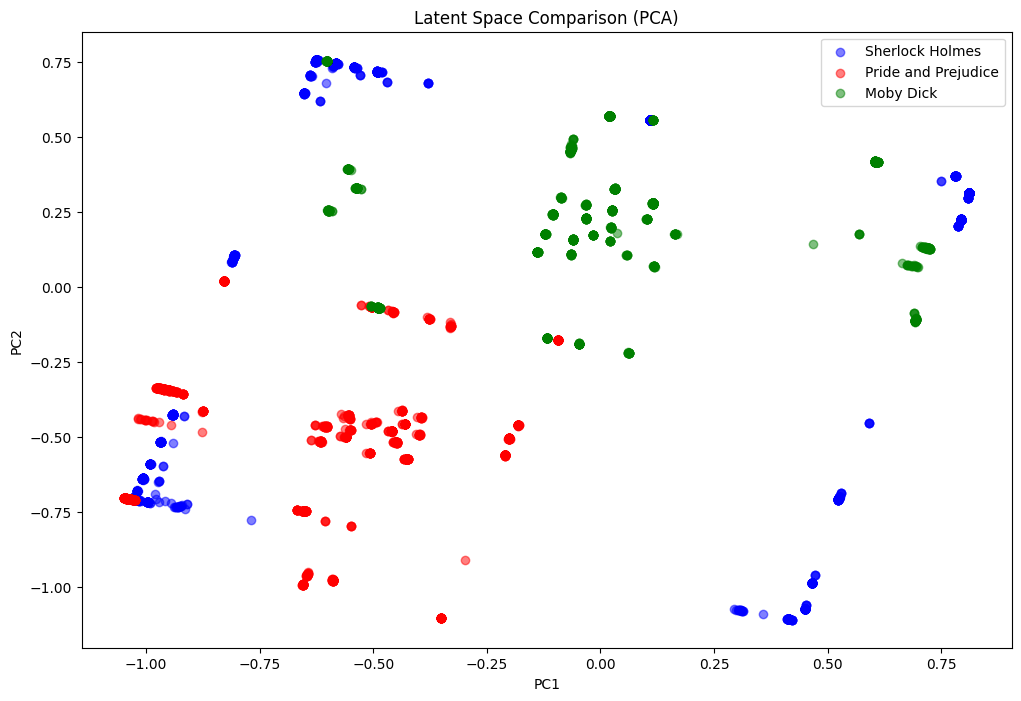

Average Cosine Similarity between Sherlock Holmes and Pride and Prejudice: -0.1976
Average Cosine Similarity between Sherlock Holmes and Moby Dick: 0.3272
Average Cosine Similarity between Pride and Prejudice and Moby Dick: -0.5803


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torch.nn.parameter import Parameter

# Verify versions
print(f"PyTorch version: {torch.__version__}")
import sympy
print(f"SymPy version: {sympy.__version__}")

sources = {
    "Sherlock Holmes": "http://www.gutenberg.org/files/1661/1661-0.txt",
    "Pride and Prejudice": "http://www.gutenberg.org/files/1342/1342-0.txt",
    "Moby Dick": "http://www.gutenberg.org/files/2701/2701-0.txt"
}

corpora = {}
for name, url in sources.items():
    response = requests.get(url)
    text = response.text[:15000]
    sentences = text.split('\n')[:200]
    corpora[name] = sentences
    print(f"Sample from {name}:", sentences[:3])

all_chars = sorted(set(''.join(''.join(sentences) for sentences in corpora.values())))
char_to_idx = {ch: idx for idx, ch in enumerate(all_chars)}
idx_to_char = {idx: ch for ch, idx in char_to_idx.items()}
vocab_size = len(all_chars)
print(f"Vocab size: {vocab_size}, Characters: {all_chars}")

def text_to_windows(text, window_size=16):
    text = ''.join(text)
    windows = []
    for i in range(0, len(text) - window_size + 1):
        window = text[i:i + window_size]
        windows.append([char_to_idx[ch] for ch in window])
    return windows

window_size = 16
training_sentences = corpora["Sherlock Holmes"]
windows = text_to_windows(training_sentences, window_size)
print(f"Number of windows: {len(windows)}, Sample window: {[idx_to_char[idx] for idx in windows[0]]}")
windows_tensor = torch.tensor(windows, dtype=torch.long)

def get_positional_encoding(seq_len, d_model):
    pe = torch.zeros(seq_len, d_model)
    position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe

class CharAutoEncoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, window_size=16, init_embeddings=None):
        super(CharAutoEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if init_embeddings is not None:
            self.embedding.weight = Parameter(torch.tensor(init_embeddings, dtype=torch.float32))
        self.pos_encoding = get_positional_encoding(window_size, embedding_dim).unsqueeze(0)
        self.encoder = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.decoder = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded + self.pos_encoding.to(embedded.device)
        encoded, (h, c) = self.encoder(embedded)
        decoded, _ = self.decoder(encoded)
        output = self.fc(decoded)
        return encoded, output

def generate_embeddings_from_corpus(corpus, vocab_size, embedding_dim):
    text = ''.join(corpus)
    char_freq = {ch: 0 for ch in all_chars}
    total_chars = len(text)
    for ch in text:
        char_freq[ch] += 1
    embeddings = np.zeros((vocab_size, embedding_dim))
    for ch, idx in char_to_idx.items():
        freq = char_freq[ch] / total_chars if total_chars > 0 else 0
        embeddings[idx, 0] = freq * 10
        embeddings[idx, 1:] = np.random.randn(embedding_dim - 1) * 0.1
    return embeddings

embedding_dim = 32
hidden_dim = 2
models = {}
for name, sentences in corpora.items():
    embeddings = generate_embeddings_from_corpus(sentences, vocab_size, embedding_dim)
    model = CharAutoEncoder(vocab_size, embedding_dim, hidden_dim, init_embeddings=embeddings)
    models[name] = model
    print(f"Initialized model for {name} with custom embeddings")
def train_model(model, windows_tensor, num_epochs=1500, batch_size=128):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.005)
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for i in range(0, len(windows_tensor) - batch_size, batch_size):
            batch_windows = windows_tensor[i:i + batch_size]
            optimizer.zero_grad()
            encoded, output = model(batch_windows)
            loss = criterion(output.view(-1, vocab_size), batch_windows.view(-1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / (len(windows_tensor) // batch_size)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}, Avg Loss: {avg_loss:.6f}")
    return model
for name, model in models.items():
    print(f"\nTraining model with embeddings from {name}:")
    models[name] = train_model(model, windows_tensor)
for name, model in models.items():
    torch.save(model.state_dict(), f'char_autoencoder_{name.replace(" ", "_").lower()}.pth')
def get_latent_vectors(model, windows_tensor, num_samples=100):
    model.eval()
    with torch.no_grad():
        sample_windows = windows_tensor[:num_samples]
        encoded, _ = model(sample_windows)
        return encoded.reshape(-1, hidden_dim).cpu().numpy()

latent_spaces = {name: get_latent_vectors(model, windows_tensor) for name, model in models.items()}
pca = PCA(n_components=2)
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green']
for i, (name, latent) in enumerate(latent_spaces.items()):
    latent_2d = pca.fit_transform(latent) if i == 0 else pca.transform(latent)
    plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=colors[i], label=name, alpha=0.5)

plt.title("Latent Space Comparison (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()
from itertools import combinations
for (name1, latent1), (name2, latent2) in combinations(latent_spaces.items(), 2):
    cos_sim = np.mean([np.dot(latent1[i], latent2[i]) /
                       (np.linalg.norm(latent1[i]) * np.linalg.norm(latent2[i]))
                       for i in range(len(latent1))])
    print(f"Average Cosine Similarity between {name1} and {name2}: {cos_sim:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


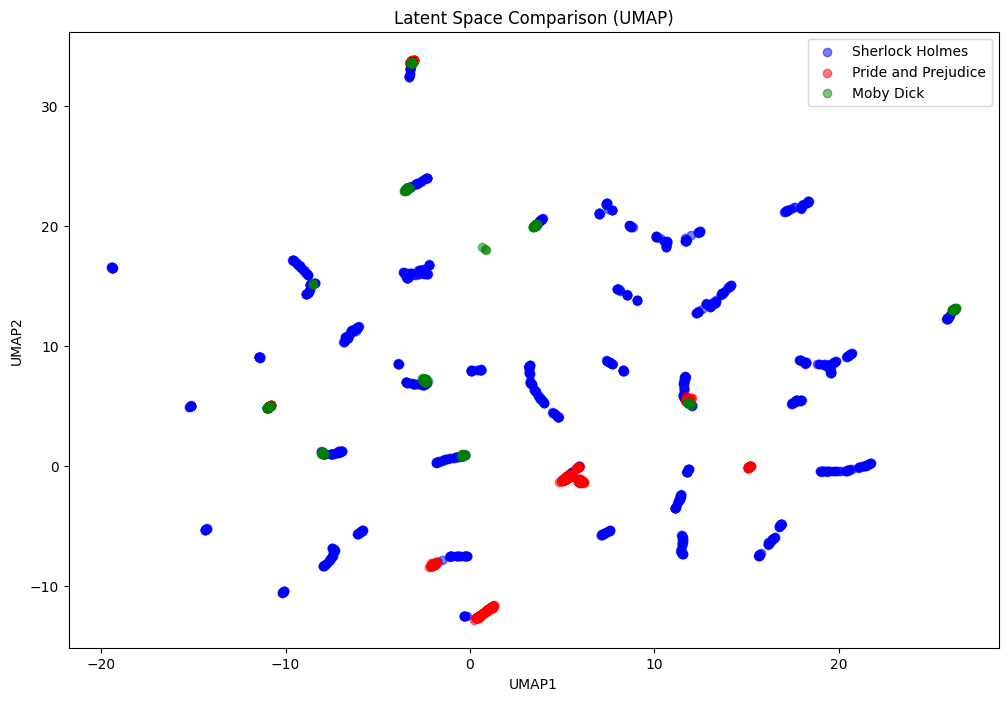

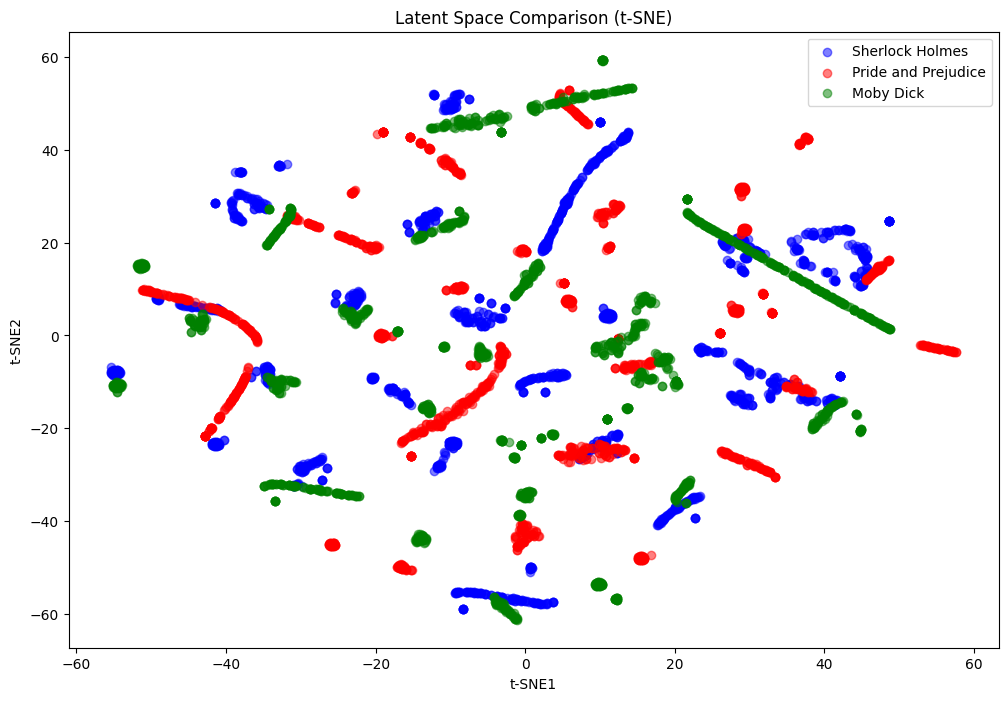


Cosine Similarity between Latent Spaces:
Average Cosine Similarity between Sherlock Holmes and Pride and Prejudice: -0.1976
Average Cosine Similarity between Sherlock Holmes and Moby Dick: 0.3272
Average Cosine Similarity between Pride and Prejudice and Moby Dick: -0.5803

Pairwise Euclidean Distance between Latent Spaces:
Average Euclidean Distance between Sherlock Holmes and Pride and Prejudice: 1.3059
Average Euclidean Distance between Sherlock Holmes and Moby Dick: 0.8134
Average Euclidean Distance between Pride and Prejudice and Moby Dick: 1.1731

KL Divergence between Latent Spaces (Approximation):
KL Divergence from Sherlock Holmes to Pride and Prejudice: 15.4185
KL Divergence from Sherlock Holmes to Moby Dick: 5.1099
KL Divergence from Pride and Prejudice to Moby Dick: 18.8346


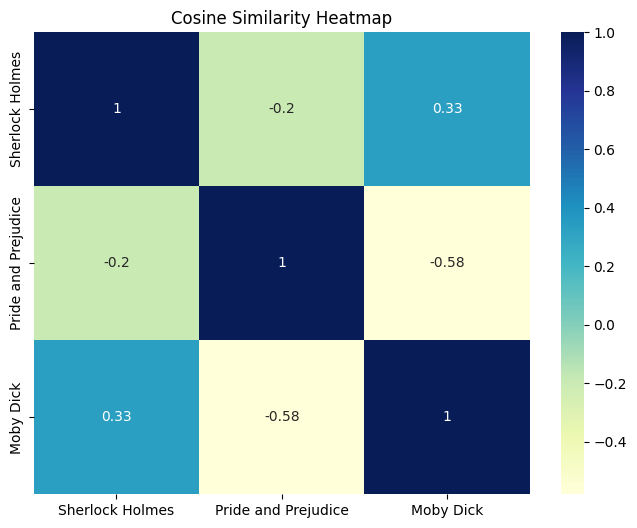

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from scipy.stats import entropy
from itertools import combinations
# 1. UMAP Visualization (already provided)
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green']
for i, (name, latent) in enumerate(latent_spaces.items()):
    latent_2d = reducer.fit_transform(latent) if i == 0 else reducer.transform(latent)
    plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=colors[i], label=name, alpha=0.5)

plt.title("Latent Space Comparison (UMAP)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()
# 2. t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
plt.figure(figsize=(12, 8))
for i, (name, latent) in enumerate(latent_spaces.items()):
    latent_2d = tsne.fit_transform(latent) if i == 0 else tsne.fit_transform(latent)
    plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=colors[i], label=name, alpha=0.5)

plt.title("Latent Space Comparison (t-SNE)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()
# 3. Cosine Similarity (already provided)
print("\nCosine Similarity between Latent Spaces:")
for (name1, latent1), (name2, latent2) in combinations(latent_spaces.items(), 2):
    cos_sim = np.mean([np.dot(latent1[i], latent2[i]) /
                       (np.linalg.norm(latent1[i]) * np.linalg.norm(latent2[i]))
                       for i in range(len(latent1))])
    print(f"Average Cosine Similarity between {name1} and {name2}: {cos_sim:.4f}")
# 4. Pairwise Euclidean Distance
print("\nPairwise Euclidean Distance between Latent Spaces:")
for (name1, latent1), (name2, latent2) in combinations(latent_spaces.items(), 2):
    euclidean_dist = np.mean([np.linalg.norm(latent1[i] - latent2[i]) for i in range(len(latent1))])
    print(f"Average Euclidean Distance between {name1} and {name2}: {euclidean_dist:.4f}")
# 5. KL Divergence (Approximation using histograms)
print("\nKL Divergence between Latent Spaces (Approximation):")
for (name1, latent1), (name2, latent2) in combinations(latent_spaces.items(), 2):
    hist1, bins = np.histogram(latent1.flatten(), bins=50, density=True)
    hist2, _ = np.histogram(latent2.flatten(), bins=bins, density=True)
    hist1 = hist1 + 1e-10
    hist2 = hist2 + 1e-10
    kl_div = entropy(hist1, hist2)
    print(f"KL Divergence from {name1} to {name2}: {kl_div:.4f}")
# 6. Correlation Heatmap of Cosine Similarities
names = list(latent_spaces.keys())
cos_matrix = np.zeros((len(names), len(names)))
for i, (name1, latent1) in enumerate(latent_spaces.items()):
    for j, (name2, latent2) in enumerate(latent_spaces.items()):
        if i == j:
            cos_matrix[i, j] = 1.0
        else:
            cos_sim = np.mean([np.dot(latent1[k], latent2[k]) /
                               (np.linalg.norm(latent1[k]) * np.linalg.norm(latent2[k]))
                               for k in range(len(latent1))])
            cos_matrix[i, j] = cos_sim
            cos_matrix[j, i] = cos_sim

plt.figure(figsize=(8, 6))
sns.heatmap(cos_matrix, annot=True, xticklabels=names, yticklabels=names, cmap="YlGnBu")
plt.title("Cosine Similarity Heatmap")
plt.show()

New tester script

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import time
import requests
from torch.nn.parameter import Parameter
class CharAutoEncoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, window_size=16, init_embeddings=None):
        super(CharAutoEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        if init_embeddings is not None:
            self.embedding.weight = Parameter(torch.tensor(init_embeddings, dtype=torch.float32))
        self.pos_encoding = get_positional_encoding(window_size, embedding_dim).unsqueeze(0)
        self.encoder = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.decoder = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded + self.pos_encoding.to(embedded.device)
        encoded, (h, c) = self.encoder(embedded)
        decoded, _ = self.decoder(encoded)
        output = self.fc(decoded)
        return encoded, output

def get_positional_encoding(seq_len, d_model):
    pe = torch.zeros(seq_len, d_model)
    position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe

sources = {
    "Sherlock Holmes": "http://www.gutenberg.org/files/1661/1661-0.txt",
    "Pride and Prejudice": "http://www.gutenberg.org/files/1342/1342-0.txt",
    "Moby Dick": "http://www.gutenberg.org/files/2701/2701-0.txt"
}

corpora = {}
for name, url in sources.items():
    response = requests.get(url)
    text = response.text[:15000]
    sentences = text.split('\n')[:200]
    corpora[name] = sentences

all_chars = sorted(set(''.join(''.join(sentences) for sentences in corpora.values())))
char_to_idx = {ch: idx for idx, ch in enumerate(all_chars)}
idx_to_char = {idx: ch for ch, idx in char_to_idx.items()}
vocab_size = len(all_chars)
print(f"Vocab size: {vocab_size}, Characters: {all_chars}")

def generate_embeddings_from_corpus(corpus, vocab_size, embedding_dim):
    text = ''.join(corpus)
    char_freq = {ch: 0 for ch in all_chars}
    total_chars = len(text)
    for ch in text:
        char_freq[ch] += 1
    embeddings = np.zeros((vocab_size, embedding_dim))
    for ch, idx in char_to_idx.items():
        freq = char_freq[ch] / total_chars if total_chars > 0 else 0
        embeddings[idx, 0] = freq * 10
        embeddings[idx, 1:] = np.random.randn(embedding_dim - 1) * 0.1
    return embeddings

# Load trained models
embedding_dim = 32
hidden_dim = 2
window_size = 16
model_sources = {
    "Sherlock Holmes": "char_autoencoder_sherlock_holmes.pth",
    "Pride and Prejudice": "char_autoencoder_pride_and_prejudice.pth",
    "Moby Dick": "char_autoencoder_moby_dick.pth"
}
models = {}
for name, path in model_sources.items():
    embeddings = generate_embeddings_from_corpus(corpora[name], vocab_size, embedding_dim)
    model = CharAutoEncoder(vocab_size, embedding_dim, hidden_dim, window_size, init_embeddings=embeddings)
    model.load_state_dict(torch.load(path))
    model.eval()
    models[name] = model
    print(f"Loaded model for {name} from {path}")

def split_into_blocks(sentence, window_size=16):
    blocks = []
    for i in range(0, len(sentence), window_size):
        block = sentence[i:i + window_size]
        if len(block) < window_size:
            block = block + ' ' * (window_size - len(block))
        blocks.append(block)
    return blocks

def get_tensor_size(tensor):
    return tensor.element_size() * tensor.nelement()

def test_sentence(sentence, models, char_to_idx, idx_to_char, window_size=16):
    print(f"\nTesting sentence: '{sentence}'")
    blocks = split_into_blocks(sentence, window_size)
    for model_name, model in models.items():
        print(f"\n--- Model initialized with {model_name} embeddings ---")
        input_tensors = []
        for block in blocks:
            try:
                tensor = torch.tensor([[char_to_idx[ch] for ch in block]], dtype=torch.long)
                input_tensors.append(tensor)
            except KeyError as e:
                print(f"Warning: Character '{e.args[0]}' not in vocabulary for {model_name}. Skipping block.")
                continue

        if not input_tensors:
            print("No valid blocks to process.")
            continue
        start_time_encrypt = time.time()
        encoded_blocks = []
        with torch.no_grad():
            for input_tensor in input_tensors:
                encoded, _ = model(input_tensor)
                encoded_blocks.append(encoded)
        encrypt_time = time.time() - start_time_encrypt
        start_time_decrypt = time.time()
        decoded_sentence = ''
        with torch.no_grad():
            for input_tensor in input_tensors:
                _, output = model(input_tensor)
                predicted_idxs = torch.argmax(output, dim=2).squeeze(0)
                decoded_chars = ''.join(idx_to_char[idx.item()] for idx in predicted_idxs)
                decoded_sentence += decoded_chars
        decrypt_time = time.time() - start_time_decrypt
        plaintext_bytes = len(sentence.encode('utf-8'))
        ciphertext_bytes = sum(get_tensor_size(tensor) for tensor in encoded_blocks)
        print(f"Number of 16-char blocks: {len(blocks)}")
        print(f"Plaintext Size: {plaintext_bytes} bytes")
        print(f"Ciphertext Size: {ciphertext_bytes} bytes")
        print(f"Sample Encoded Block (first block, last timestep, first 5 dims): {encoded_blocks[0][0, -1, :5].tolist()}")
        print(f"Decoded Output: {decoded_sentence[:len(sentence)]}")
        print(f"Encryption Time: {encrypt_time:.6f} seconds")
        print(f"Decryption Time: {decrypt_time:.6f} seconds")
test_sentences = [
    "I love building neural nets with Python!",
    "Quantum computing is wild and crazy stuff.",
    "zxylophone plays funky tunes all day long.",
    "Qwertyuiop is nonsense in any language!"
]
print("\nTesting character-level encoding/decoding across models:")
for sentence in test_sentences:
    test_sentence(sentence, models, char_to_idx, idx_to_char, window_size)
print("\nPrinting encoder weights from loaded models:")
for name, model in models.items():
    print(f"\nWeights for {name}:")
    for weight_name, param in model.encoder.named_parameters():
        print(f"{weight_name}: {param.shape}")
        print(f"Sample values (first few): {param.data[:5]}")

Vocab size: 84, Characters: ['\r', ' ', '!', '#', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'â', 'é', '—', '’', '“', '”', '\ufeff']
Loaded model for Sherlock Holmes from char_autoencoder_sherlock_holmes.pth
Loaded model for Pride and Prejudice from char_autoencoder_pride_and_prejudice.pth
Loaded model for Moby Dick from char_autoencoder_moby_dick.pth

Testing character-level encoding/decoding across models:

Testing sentence: 'I love building neural nets with Python!'

--- Model initialized with Sherlock Holmes embeddings ---
Number of 16-char blocks: 3
Plaintext Size: 40 bytes
Ciphertext Size: 384 bytes
Sample Encoded Block (first block, last timestep, first 5 dims): 

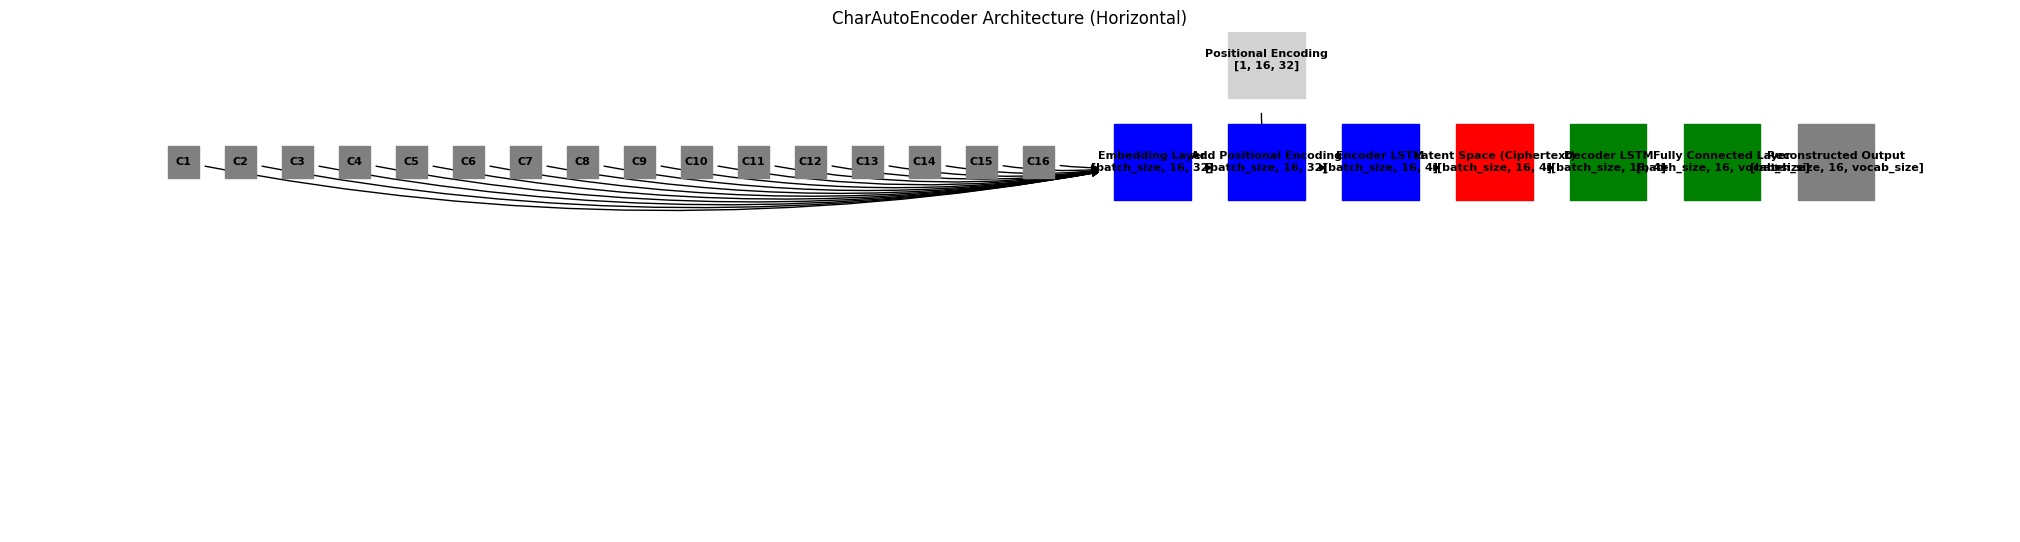

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()


for i in range(1, 17):
    G.add_node(f"C{i}", label=f"C{i}", pos=(i-1, 0))


G.add_node("Embed", label="Embedding Layer\n[batch_size, 16, 32]", pos=(17, 0))
G.add_node("PosEnc", label="Add Positional Encoding\n[batch_size, 16, 32]", pos=(19, 0))
G.add_node("EncLSTM", label="Encoder LSTM\n[batch_size, 16, 4]", pos=(21, 0))
G.add_node("Latent", label="Latent Space (Ciphertext)\n[batch_size, 16, 4]", pos=(23, 0))
G.add_node("DecLSTM", label="Decoder LSTM\n[batch_size, 16, 4]", pos=(25, 0))
G.add_node("FC", label="Fully Connected Layer\n[batch_size, 16, vocab_size]", pos=(27, 0))
G.add_node("Output", label="Reconstructed Output\n[batch_size, 16, vocab_size]", pos=(29, 0))
G.add_node("PosEncInput", label="Positional Encoding\n[1, 16, 32]", pos=(19, 1))


for i in range(1, 17):
    G.add_edge(f"C{i}", "Embed")
G.add_edges_from([("Embed", "PosEnc"), ("PosEnc", "EncLSTM"), ("EncLSTM", "Latent"),
                  ("Latent", "DecLSTM"), ("DecLSTM", "FC"), ("FC", "Output"), ("PosEncInput", "PosEnc")])


pos = nx.get_node_attributes(G, 'pos')


plt.figure(figsize=(20, 5))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        node_size=[500 if n.startswith("C") else 3000 for n in G.nodes()],
        node_color=['gray']*16 + ['blue', 'blue', 'blue', 'red', 'green', 'green', 'gray', 'lightgray'],
        node_shape='s', font_size=8, font_weight='bold', arrows=True, connectionstyle="arc3,rad=0.1")
plt.title("CharAutoEncoder Architecture (Horizontal)")
plt.axis('off')
plt.show()